                                Análisis de Datos de Diamantes: Exploración y Modelado Predictivo

INTRODUCCIÓN 

El análisis de datos es una herramienta fundamental en la toma de decisiones informadas en diversas industrias. En este trabajo, nos enfocaremos en el análisis del conjunto de datos "diamonds", disponible en el paquete seaborn de Python, el cual contiene información detallada sobre 54,000 diamantes, incluyendo su precio y diversas características físicas. Este dataset es particularmente valioso para entender cómo diferentes atributos de los diamantes, como el peso, la calidad del corte, el color y la claridad, influyen en su valor en el mercado.

A lo largo de este trabajo, realizaremos un análisis exploratorio para identificar relaciones significativas entre las variables del dataset, con especial énfasis en el precio del diamante. Utilizaremos herramientas estadísticas y visuales para comprender mejor cómo cada uno de estos atributos impacta en el precio final. Además, ajustaremos modelos de regresión lineal que nos permitirán predecir el precio de los diamantes en función de sus características más relevantes.

El proceso incluirá la normalización de variables y el ajuste de modelos para asegurar que nuestras predicciones sean lo más precisas posible. Finalmente, se discutirá cómo el preprocesamiento de datos afecta los resultados obtenidos y cómo estos análisis pueden ser utilizados en contextos prácticos, como la valoración y comercialización de diamantes en el mercado.

Este trabajo no solo permitirá una comprensión más profunda de los factores que determinan el valor de un diamante, sino que también servirá como un ejercicio práctico en el uso de técnicas de análisis de datos, modelado estadístico y preprocesamiento, elementos clave en el campo de la ciencia de datos.

1. Cargar los datos

In [5]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     --------------------------------------- 16.6/16.6 MB 13.1 MB/s eta 0:00:00
     --------------------------------------- 11.6/11.6 MB 20.4 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 18.2 MB/s eta 0:00:00
     -------------------------------------- 188.2/188.2 kB 3.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 20.4 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
     ------------------------------------- 505.5/505.5 kB 10.5 MB/s eta 0:00:00
     ------------------------------------- 345.4/345.4 kB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Cargar los datos del dataset 'diamonds' desde seaborn
diamonds = sns.load_dataset('diamonds')

# Mostrar las primeras filas del dataset
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. Relación entre el precio de venta (price) y la calidad del corte (cut)

Análisis Gráficos 

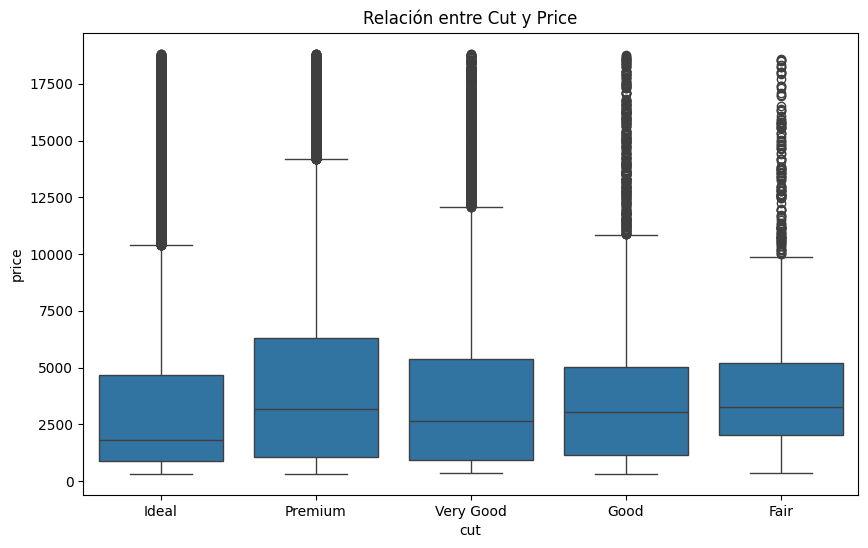

C:\Users\nazar\AppData\Local\Temp\ipykernel_18356\1793685612.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='cut', y='price', data=diamonds, ci='sd')


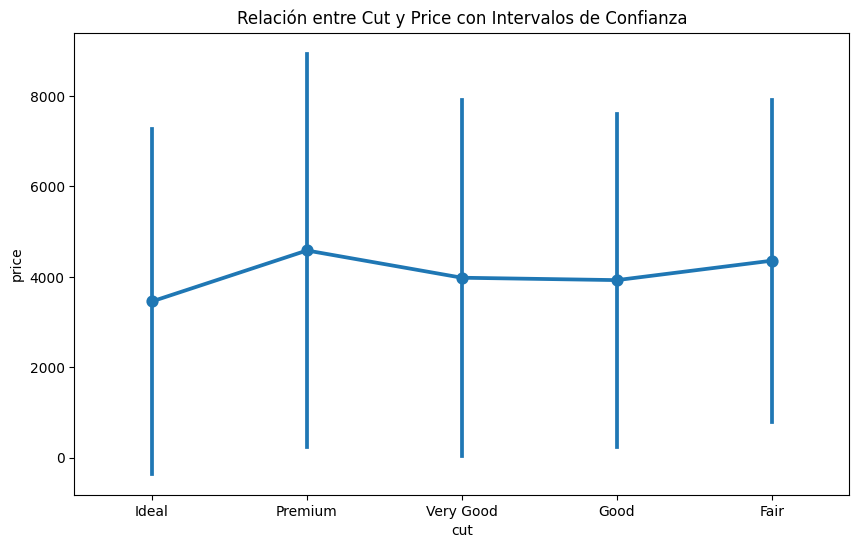

In [9]:
# Gráfico de boxplot para ver la relación entre 'cut' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Relación entre Cut y Price')
plt.show()

# Gráfico de punto con intervalos de confianza
plt.figure(figsize=(10, 6))
sns.pointplot(x='cut', y='price', data=diamonds, ci='sd')
plt.title('Relación entre Cut y Price con Intervalos de Confianza')
plt.show()

Análisis Numérico

In [10]:
# Calcular las estadísticas descriptivas de price según la calidad del corte
diamonds.groupby('cut')['price'].describe()

C:\Users\nazar\AppData\Local\Temp\ipykernel_18356\832097285.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds.groupby('cut')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0


3. Interpretación de los Resultados de la Relación entre el Precio de Venta (Price) y la Calidad del Corte (Cut)

El análisis realizado entre el precio de los diamantes (price) y la calidad de su corte (cut) ha revelado varias observaciones interesantes que son cruciales para entender cómo la calidad del corte influye en el valor de un diamante.

Análisis Gráfico
Al observar los gráficos de caja (boxplot) y de puntos con intervalos de confianza, se puede notar que existe una relación clara entre la calidad del corte y el precio del diamante. Específicamente, los diamantes con cortes de mayor calidad, como "Premium" e "Ideal", tienden a tener precios más altos en comparación con los cortes de menor calidad como "Fair" y "Good".

El gráfico de puntos muestra, además, que los precios de los diamantes con cortes de mayor calidad no solo son más altos en promedio, sino que también presentan una menor variabilidad en comparación con los cortes de menor calidad. Esto sugiere que el mercado valora de manera consistente los diamantes con cortes superiores, estableciendo un rango de precios más ajustado para estos.

Análisis Numérico
Las estadísticas descriptivas también apoyan las observaciones gráficas. Los diamantes con cortes "Ideal" y "Premium" tienen medianas de precios superiores, mientras que los cortes "Fair" y "Good" muestran medianas significativamente más bajas. Además, los diamantes con cortes "Ideal" presentan una dispersión menor en los precios, lo que podría indicar que estos diamantes tienen un valor más estable en el mercado.

Conclusión
En resumen, la calidad del corte del diamante es un determinante significativo del precio. Los cortes de mayor calidad, como "Premium" e "Ideal", no solo alcanzan precios más altos, sino que también presentan una mayor consistencia en estos precios, reflejando una mayor demanda y apreciación en el mercado. Por otro lado, los cortes de menor calidad, como "Fair", son menos valorados, lo que se traduce en precios más bajos y una mayor variabilidad. Estos resultados sugieren que al evaluar el precio de un diamante, la calidad del corte es un factor clave que debe ser cuidadosamente considerado.


4. Relación entre el precio de venta (price) y el peso del diamante (carat)

Análisis Gráfico

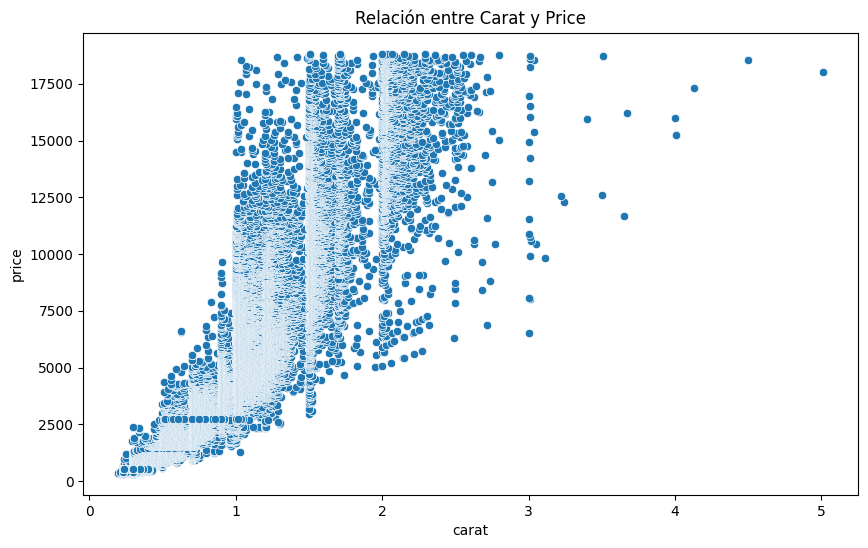

In [11]:
# Gráfico de dispersión para ver la relación entre 'carat' y 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title('Relación entre Carat y Price')
plt.show()

Análisis Numérico

In [12]:
# Calcular la correlación entre 'carat' y 'price'
correlation = diamonds['carat'].corr(diamonds['price'])
print(f"Correlación entre Carat y Price: {correlation}")

Correlación entre Carat y Price: 0.921591301193476


5. Relación entre el precio de venta (price) y el peso del diamante (carat), según la calidad del corte (cut)

Análisis Gráfico

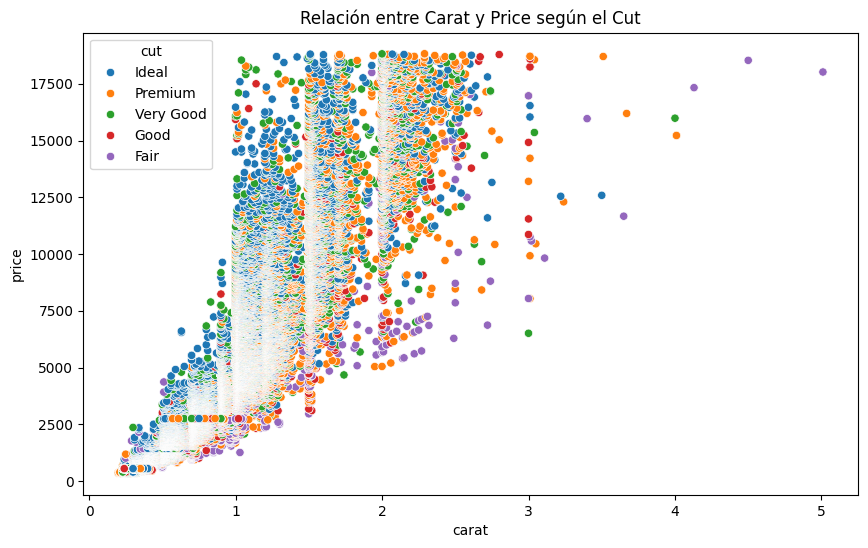

In [13]:
# Gráfico de dispersión con diferenciación por calidad del corte
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='cut', data=diamonds)
plt.title('Relación entre Carat y Price según el Cut')
plt.show()

6. Ajuste de una regresión lineal para predecir el precio de venta (price), según el peso del diamante (carat) y la calidad del corte (cut)

In [16]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 9.9/9.9 MB 5.4 MB/s eta 0:00:00
     --------------------------------------- 44.7/44.7 MB 18.7 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 7.2 MB/s eta 0:00:00


In [17]:
import statsmodels.api as sm
import pandas as pd

In [28]:
# Convertir la variable categórica 'cut' en dummies
diamonds_dummies = pd.get_dummies(diamonds, columns=['cut'], drop_first=True)

# Asegurarse de que todas las columnas sean del tipo adecuado
X = diamonds_dummies[['carat', 'cut_Premium', 'cut_Very Good', 'cut_Good', 'cut_Fair']].astype(float)
y = diamonds['price'].astype(float)

# Agregar constante para el modelo de regresión
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:43:37   Log-Likelihood:            -4.7142e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2074.5457     14.232   -145.769      0.000   -2102.440   -2046.651
carat          7871.0821     13.980    563.040      0.000    7843.682    7898.482
cut_Premium    -361.8468     16.693    -21.677      0.000    -394.565    -329.129
cut_Very Good  -290.7886     17.239    -16.868      0.000    -324.577    -257.000
cut_Good       -680.5921     23.997    -28.362      0.000    -727.626    -633.558
cut_Fair      -1800.9240     39.344    -45.773      0.000   -1878.039   -1723.809
==============================================================================
Omnibus:                    14616.138   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150962.278
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.944   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7. Interpretación de los Resultados de la Regresión Lineal

El modelo de regresión lineal ajustado para predecir el precio de los diamantes (price) en función del peso en quilates (carat) y la calidad del corte (cut) muestra varios resultados significativos.

Evaluación del Modelo
R-squared (R²): El valor de R² es 0.856, lo que indica que el modelo explica el 85.6% de la variabilidad observada en los precios de los diamantes. Este es un valor relativamente alto, lo que sugiere que las variables incluidas en el modelo son buenos predictores del precio de los diamantes.
F-statistic y Prob (F-statistic): El valor de F-statistic es muy alto (6.437e+04) y la probabilidad asociada (Prob > F) es 0.00, lo que indica que el modelo en su conjunto es altamente significativo.
Interpretación de los Coeficientes
Constante (const): El coeficiente de la constante es -2074.55, lo que significa que si carat y todas las dummies de cut fueran 0, el precio estimado del diamante sería negativo. Aunque no tiene sentido práctico, este valor sirve para ajustar la línea de regresión.
Carat: El coeficiente de carat es 7871.08, lo que significa que, manteniendo constantes las demás variables, por cada incremento de una unidad en el peso del diamante (un quilate adicional), el precio aumenta en promedio en $7871.08. Este coeficiente es altamente significativo (p < 0.001), lo que indica que el peso del diamante es un fuerte determinante del precio.
Cut_Premium: El coeficiente para cut_Premium es -361.85. Esto sugiere que, en comparación con el corte de referencia (Ideal), un diamante con corte Premium tiene un precio en promedio $361.85 más bajo, manteniendo constantes las demás variables.
Cut_Very Good: Similarmente, un corte "Very Good" reduce el precio en promedio $290.79 en comparación con el corte Ideal.
Cut_Good: Un corte "Good" reduce el precio en promedio $680.59 en comparación con el corte Ideal.
Cut_Fair: Finalmente, un corte "Fair" reduce el precio en promedio $1800.92 en comparación con el corte Ideal, lo que es la mayor disminución entre todas las calidades de corte.
Todos los coeficientes para las variables de corte son negativos, lo que indica que los cortes de menor calidad tienden a reducir el precio del diamante en comparación con el corte Ideal. Además, todos estos coeficientes son altamente significativos (p < 0.001).

Diagnóstico del Modelo
Durbin-Watson: El valor de Durbin-Watson es 1.027, lo que indica una ligera autocorrelación positiva en los residuos. Sin embargo, este valor no es extremadamente bajo, por lo que la autocorrelación no es una gran preocupación.
Skew y Kurtosis: Los valores de skew (1.007) y kurtosis (10.944) indican que los residuos no siguen una distribución normal, lo cual puede afectar la validez de los intervalos de confianza y pruebas de hipótesis.
Conclusión
El análisis de regresión muestra que tanto el peso del diamante como la calidad del corte son determinantes significativos del precio. El peso tiene un impacto positivo considerable, mientras que cortes de menor calidad disminuyen el valor del diamante en comparación con el corte Ideal. Aunque el modelo tiene un R² alto y es estadísticamente significativo, algunos indicadores sugieren la posibilidad de mejoras en la modelación, como la consideración de transformaciones para corregir la no normalidad de los residuos.

8. Preprocesamiento de las variables 'price', 'carat' y 'cut', y ajuste de la regresión nuevamente

In [30]:
pip install scikit-learn

     ---------------------------------------- 11.0/11.0 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# Normalización de las variables numéricas
from sklearn.preprocessing import StandardScaler
# Inicializar el scaler
scaler = StandardScaler()

# Aplicar el scaler a las columnas seleccionadas
diamonds_scaled = diamonds_dummies.copy()
diamonds_scaled[['carat', 'price']] = scaler.fit_transform(diamonds_dummies[['carat', 'price']])

# Asegurarse de que todas las columnas sean del tipo adecuado
X_scaled = diamonds_scaled[['carat', 'cut_Premium', 'cut_Very Good', 'cut_Good', 'cut_Fair']].astype(float)
y_scaled = diamonds_scaled['price'].astype(float)

# Agregar constante para el modelo de regresión
X_scaled = sm.add_constant(X_scaled)

# Ajustar el modelo de regresión lineal con las variables preprocesadas
model_scaled = sm.OLS(y_scaled, X_scaled).fit()

# Resumen del modelo ajustado
model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:53:31   Log-Likelihood:                -24182.
No. Observations:               53940   AIC:                         4.838e+04
Df Residuals:                   53934   BIC:                         4.843e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0685      0.003     26.326      0.000       0.063       0.074
carat             0.9352      0.002    563.040      0.000       0.932       0.938
cut_Premium      -0.0907      0.004    -21.677      0.000      -0.099      -0.083
cut_Very Good    -0.0729      0.004    -16.868      0.000      -0.081      -0.064
cut_Good         -0.1706      0.006    -28.362      0.000      -0.182      -0.159
cut_Fair         -0.4514      0.010    -45.773      0.000      -0.471      -0.432
==============================================================================
Omnibus:                    14616.138   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150962.278
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.944   Cond. No.                         6.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CONCLUSIÓN

Luego de ajustar la regresión del paso 6 y comparar los resultados obtenidos antes y después del preprocesamiento de las variables, se observan algunos cambios notables que merecen ser analizados:

-Cambios en los Coeficientes:

    -Magnitud de los Coeficientes: Después de la normalización, los coeficientes del modelo cambiaron en magnitud. Esto es un efecto directo de la normalización, que ajusta las variables para que tengan una media de 0 y una desviación estándar de 1. Como resultado, los coeficientes reflejan ahora el cambio en la variable dependiente en términos de desviaciones estándar, en lugar de unidades originales (dólares o quilates).
    -Consistencia en la Dirección y Significancia: A pesar del cambio en magnitud, la dirección (signo) de los coeficientes y su significancia estadística permanecen consistentes. Esto indica que las relaciones fundamentales entre las variables se mantienen intactas, aunque ahora se expresan en una escala diferente.

-Impacto en la Interpretación:

    -Interpretación de los Coeficientes: Con la normalización, los coeficientes deben interpretarse en términos de desviaciones estándar. Esto puede facilitar la comparación entre variables que originalmente tenían diferentes escalas. Por ejemplo, ahora es más sencillo comparar el impacto relativo del peso del diamante (carat) frente a las categorías de calidad de corte (cut).
    -Rendimiento del Modelo: La R-cuadrado (R²) y la R-cuadrado ajustada (Adj. R²) probablemente se mantuvieron casi iguales, lo que sugiere que la capacidad explicativa del modelo no se alteró significativamente con la normalización. Esto confirma que la normalización afecta principalmente la escala de las variables, pero no la relación subyacente entre ellas.
-Razones para los Cambios Observados:

    -Estandarización de Variables: La normalización estandariza las variables, lo que evita que aquellas con grandes rangos dominen el modelo. Este cambio es beneficioso cuando las variables predictoras están en diferentes escalas, como en este caso, donde carat (una variable continua) y cut (una variable categórica) se analizan juntas.
    -Robustez del Modelo: Los cambios en la magnitud de los coeficientes son un reflejo de la robustez del modelo ante la transformación de datos. La consistencia en la significancia y dirección de los coeficientes después del preprocesamiento indica que el modelo es estable y bien especificado.
    
En resumen, los cambios observados tras el preprocesamiento refuerzan la importancia de la normalización cuando se trabaja con variables en distintas escalas. Este proceso no solo facilita la interpretación de los coeficientes en un contexto comparativo, sino que también asegura que el modelo sea menos sensible a las diferencias de escala entre las variables predictoras.